<a href="https://colab.research.google.com/github/abdurahmanovakarina/SnowDeliveryTrackingSystem/blob/main/%D0%9D%D0%BE%D0%BC%D0%B5%D1%80%D0%BD%D1%8B%D0%B5_%D0%B7%D0%BD%D0%B0%D0%BA%D0%B8_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Wed Apr 10 09:24:07 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P8              13W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.9/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="tbf3cXvcU4ZaSaZM6gyt")
project = rf.workspace("project-6spg2").project("license-plate-recognition-h76hh")
version = project.version(2)
dataset = version.download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.4 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to license-plate-recognition-2 in yolov8:: 100%|██████████| 4352/4352 [00:00<00:00, 4673.83it/s]


In [6]:
%cd {HOME}

for i in ["n","s","m","l", "x"]:
  !yolo task=detect mode=train model=yolov8{i}.pt data={dataset.location}/data.yaml epochs=25 imgsz=640 plots=True

/content
100% 6.23M/6.23M [00:00<00:00, 125MB/s]
New https://pypi.org/project/ultralytics/8.1.45 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/license-plate-recognition-2/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_strid

In [7]:
!cat {HOME}/runs/detect/train/results.csv | head -15

                  epoch,         train/box_loss,         train/cls_loss,         train/dfl_loss,   metrics/precision(B),      metrics/recall(B),       metrics/mAP50(B),    metrics/mAP50-95(B),           val/box_loss,           val/cls_loss,           val/dfl_loss,                 lr/pg0,                 lr/pg1,                 lr/pg2
                      1,                 1.1955,                 3.2487,                0.88694,                0.19208,                0.19236,                0.13701,                0.09936,                 1.0697,                 3.5266,                0.89455,             0.00065965,             0.00065965,             0.00065965
                      2,                 1.0602,                 1.6631,                0.86825,                0.93652,                0.96095,                0.98408,                0.71978,                0.97098,                 1.2489,                0.86593,              0.0012738,              0.0012738,              0.

In [8]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1712741213.c605532fbc41.1026.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1425.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch1426.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch1427.jpg  weights
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg


/content


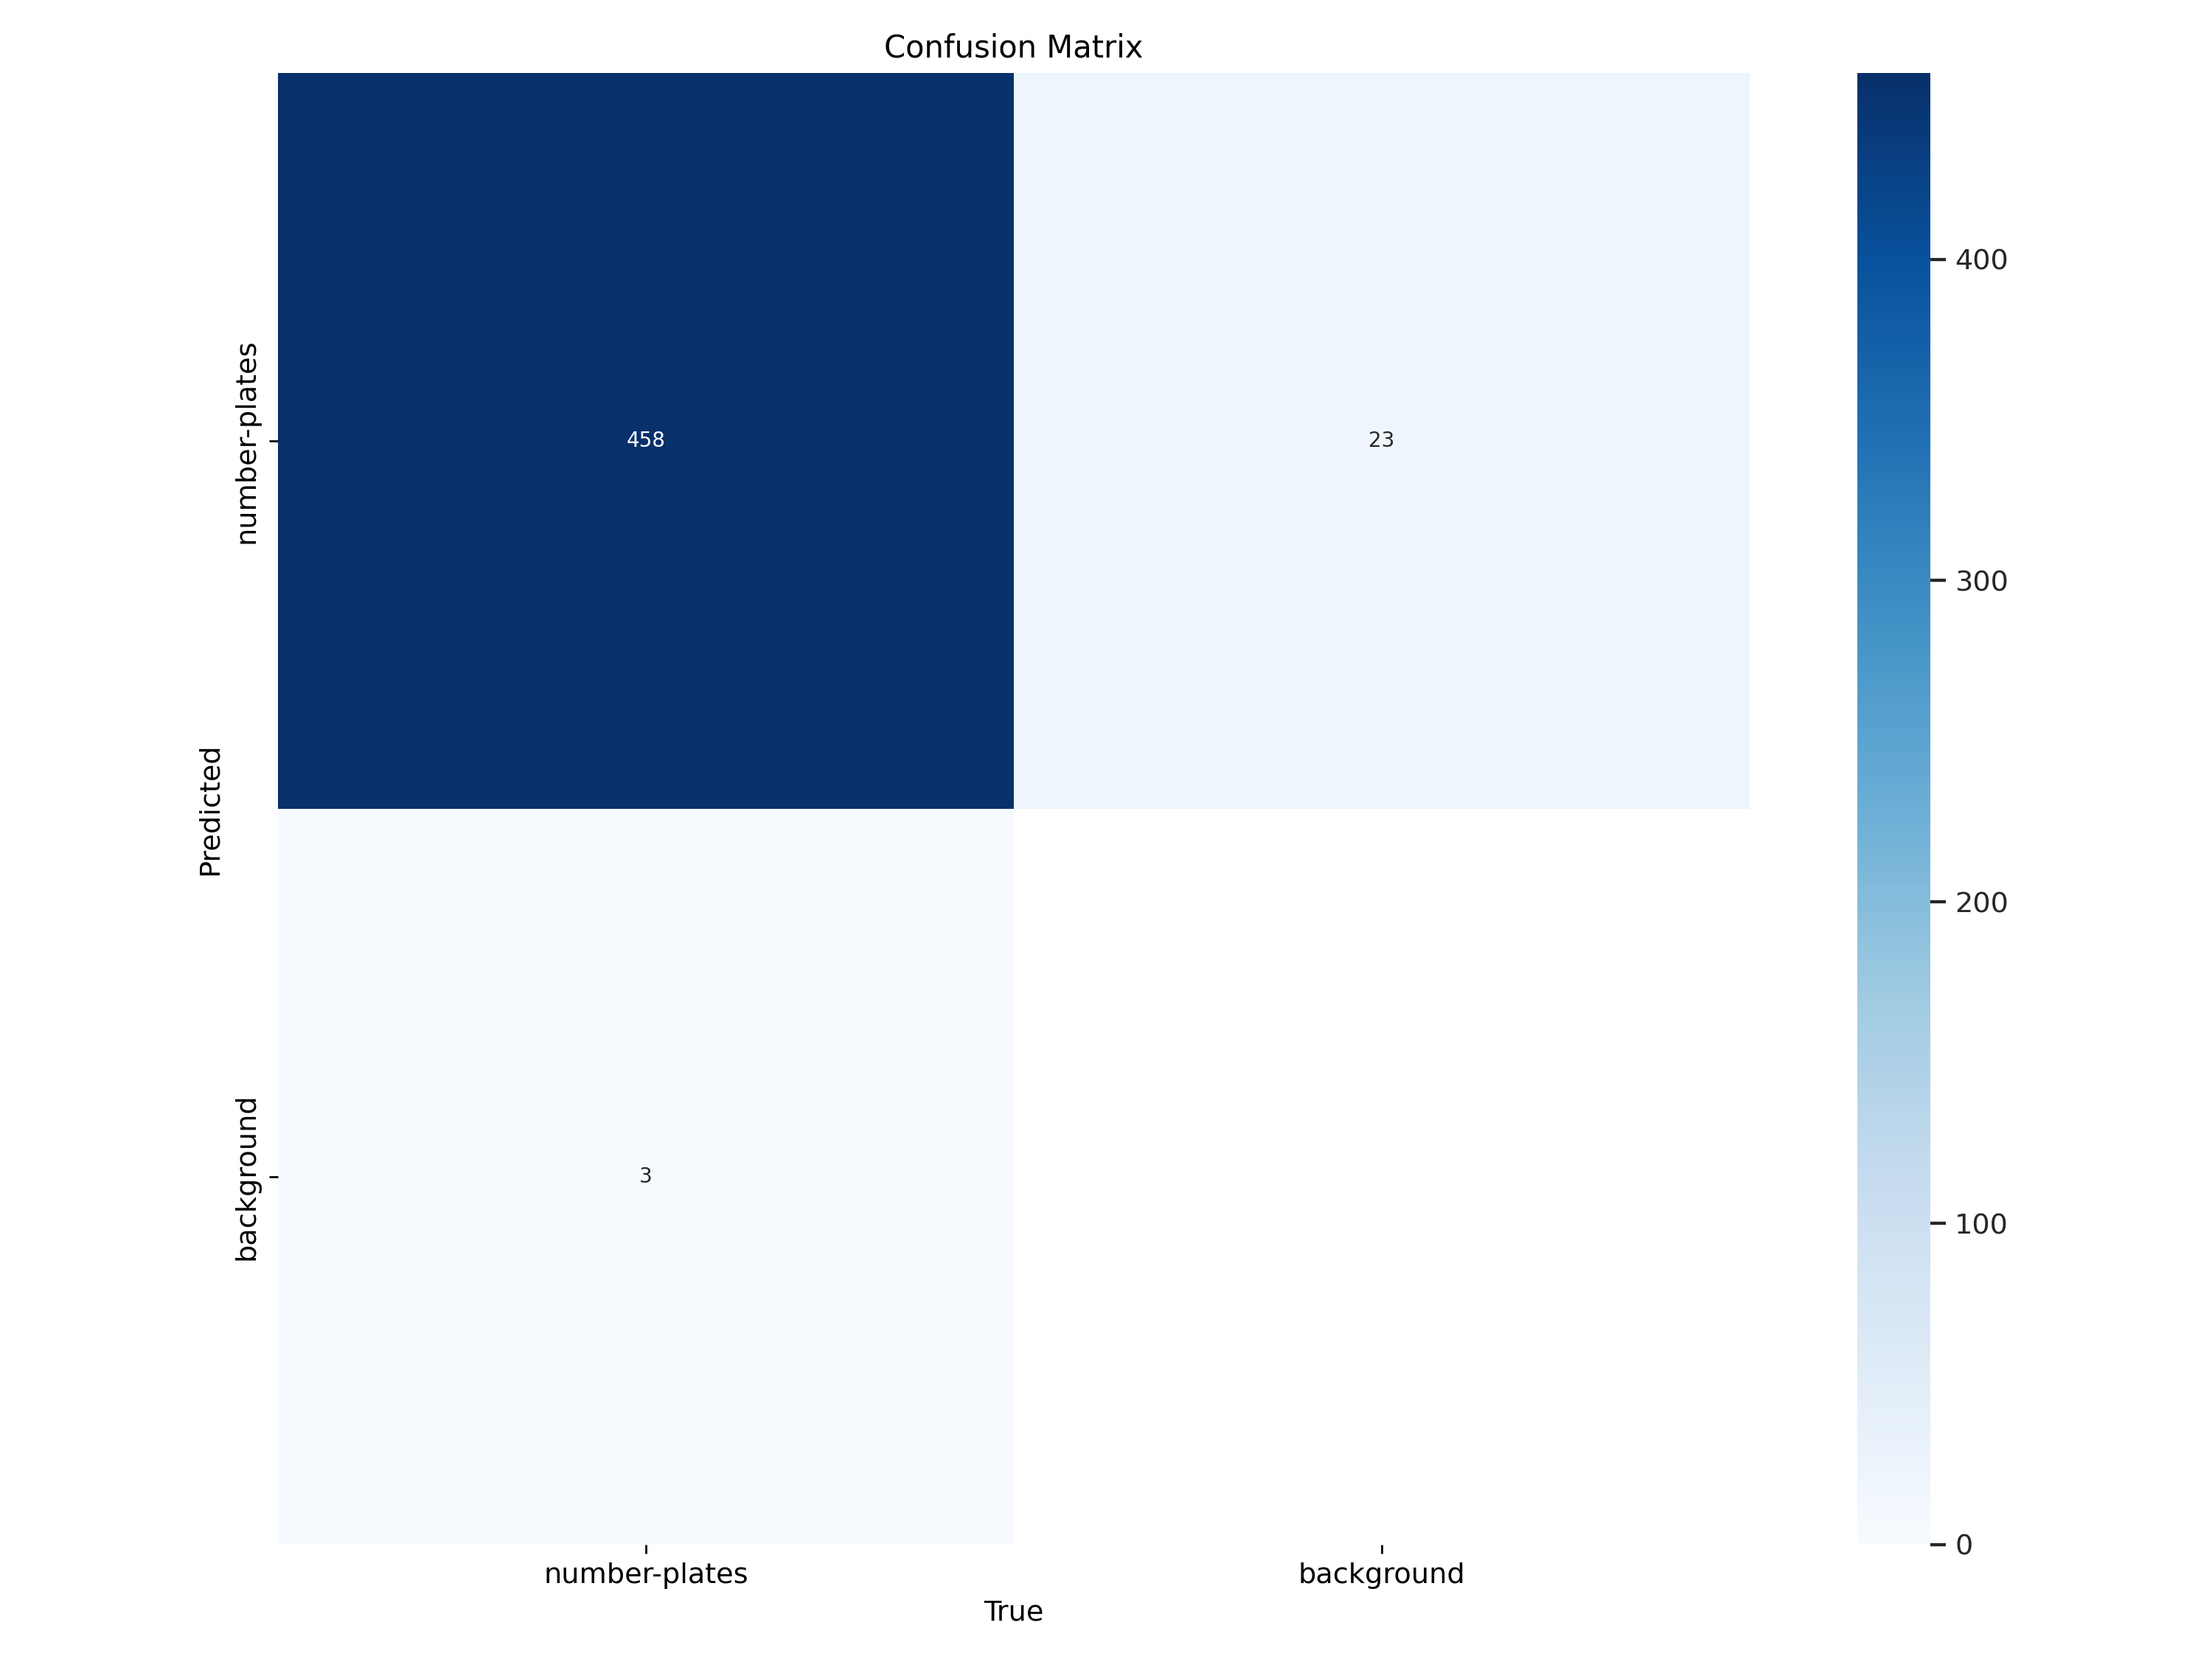

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


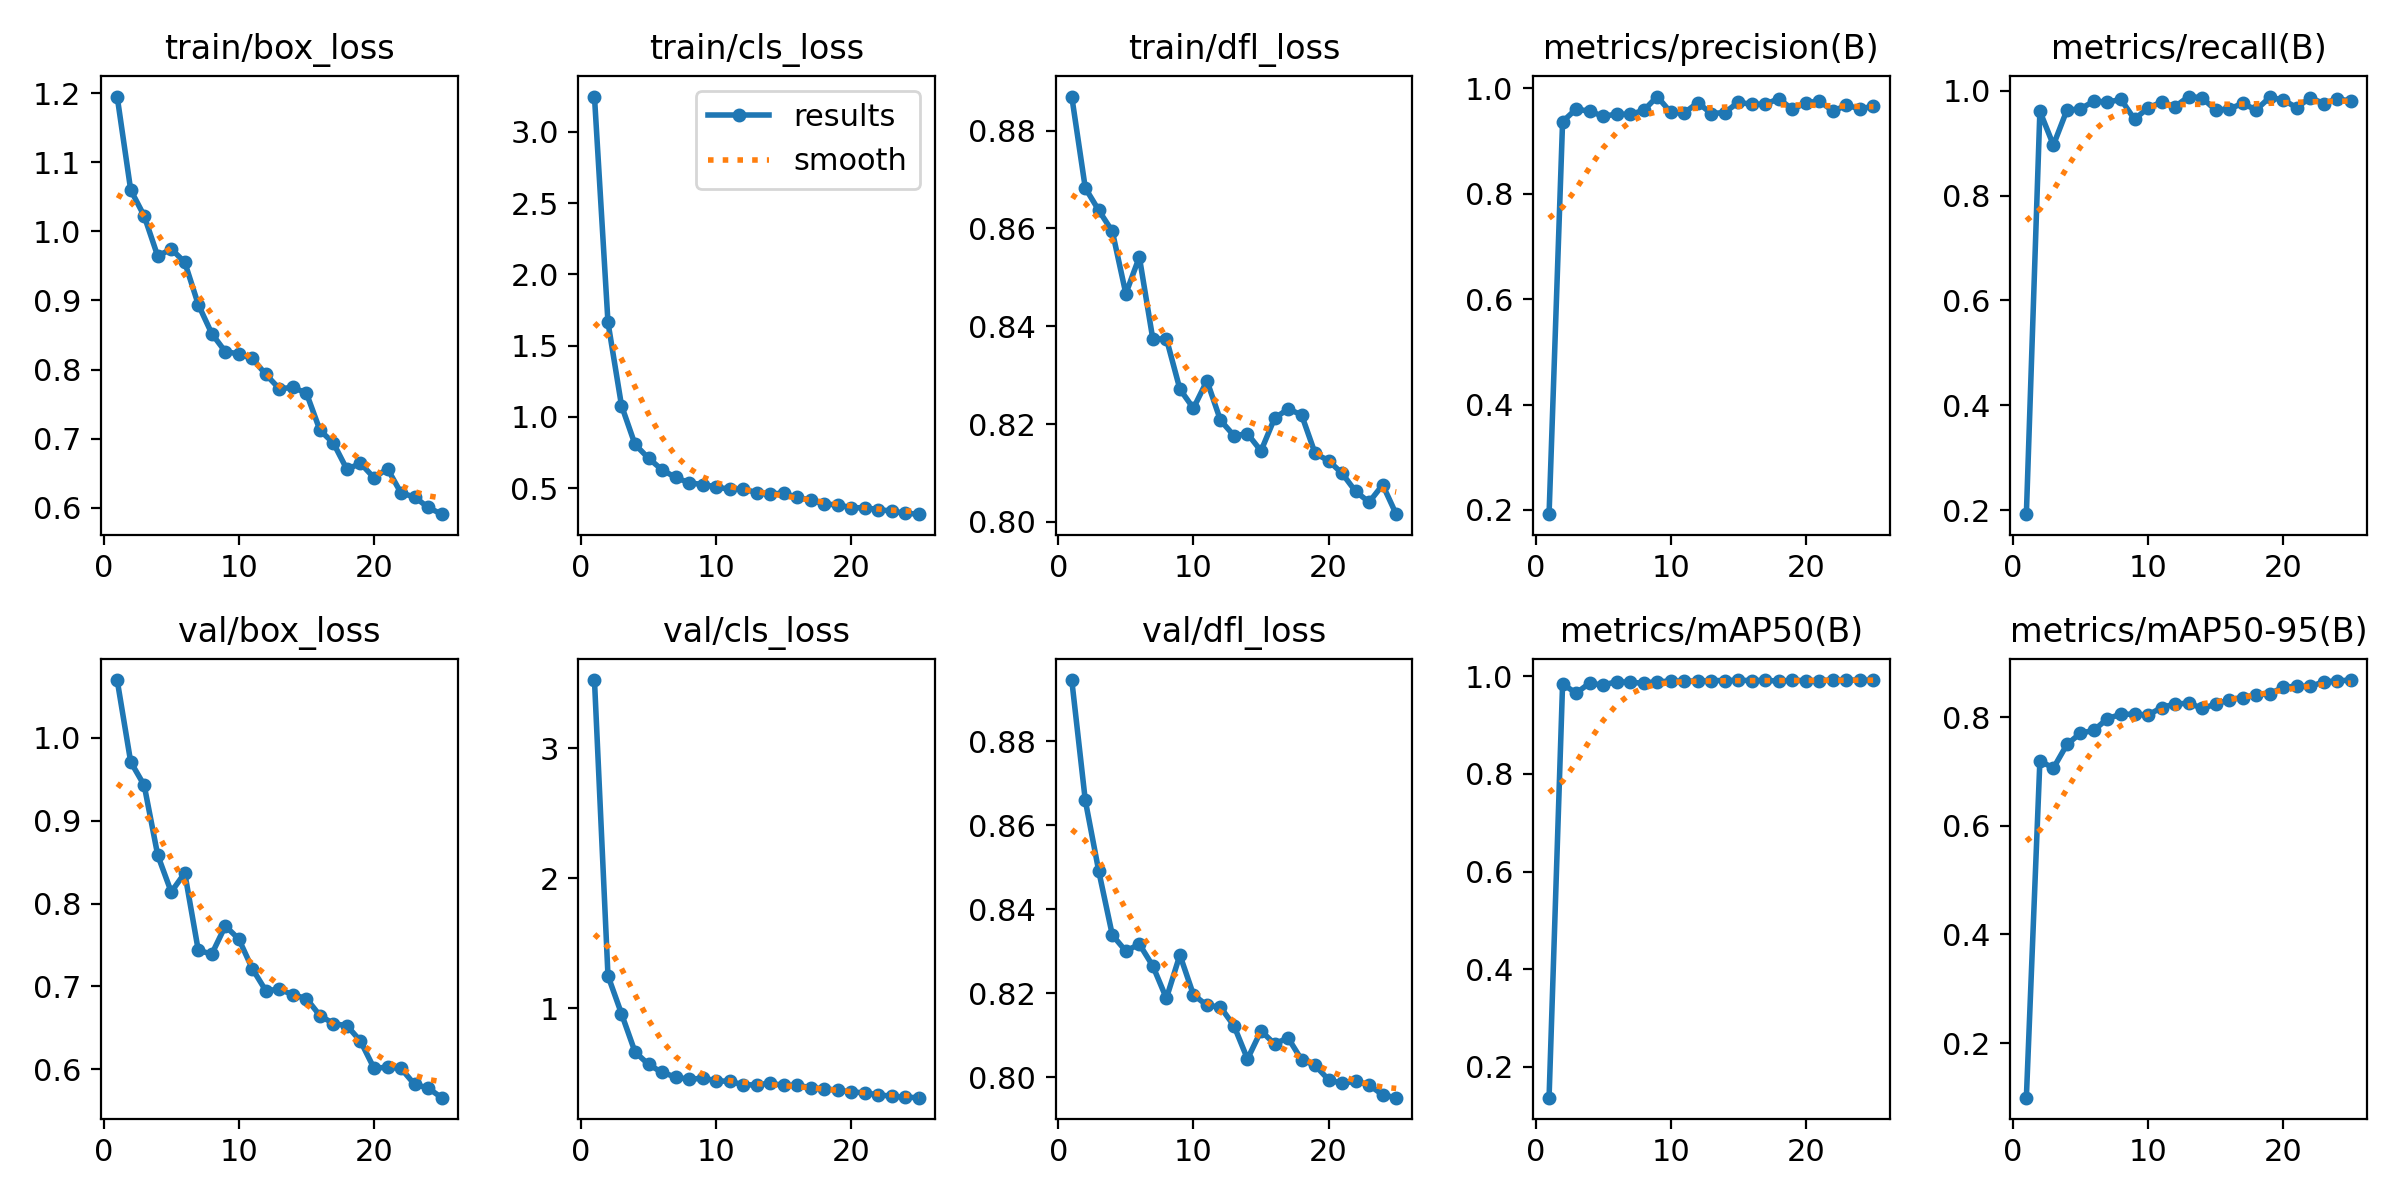

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


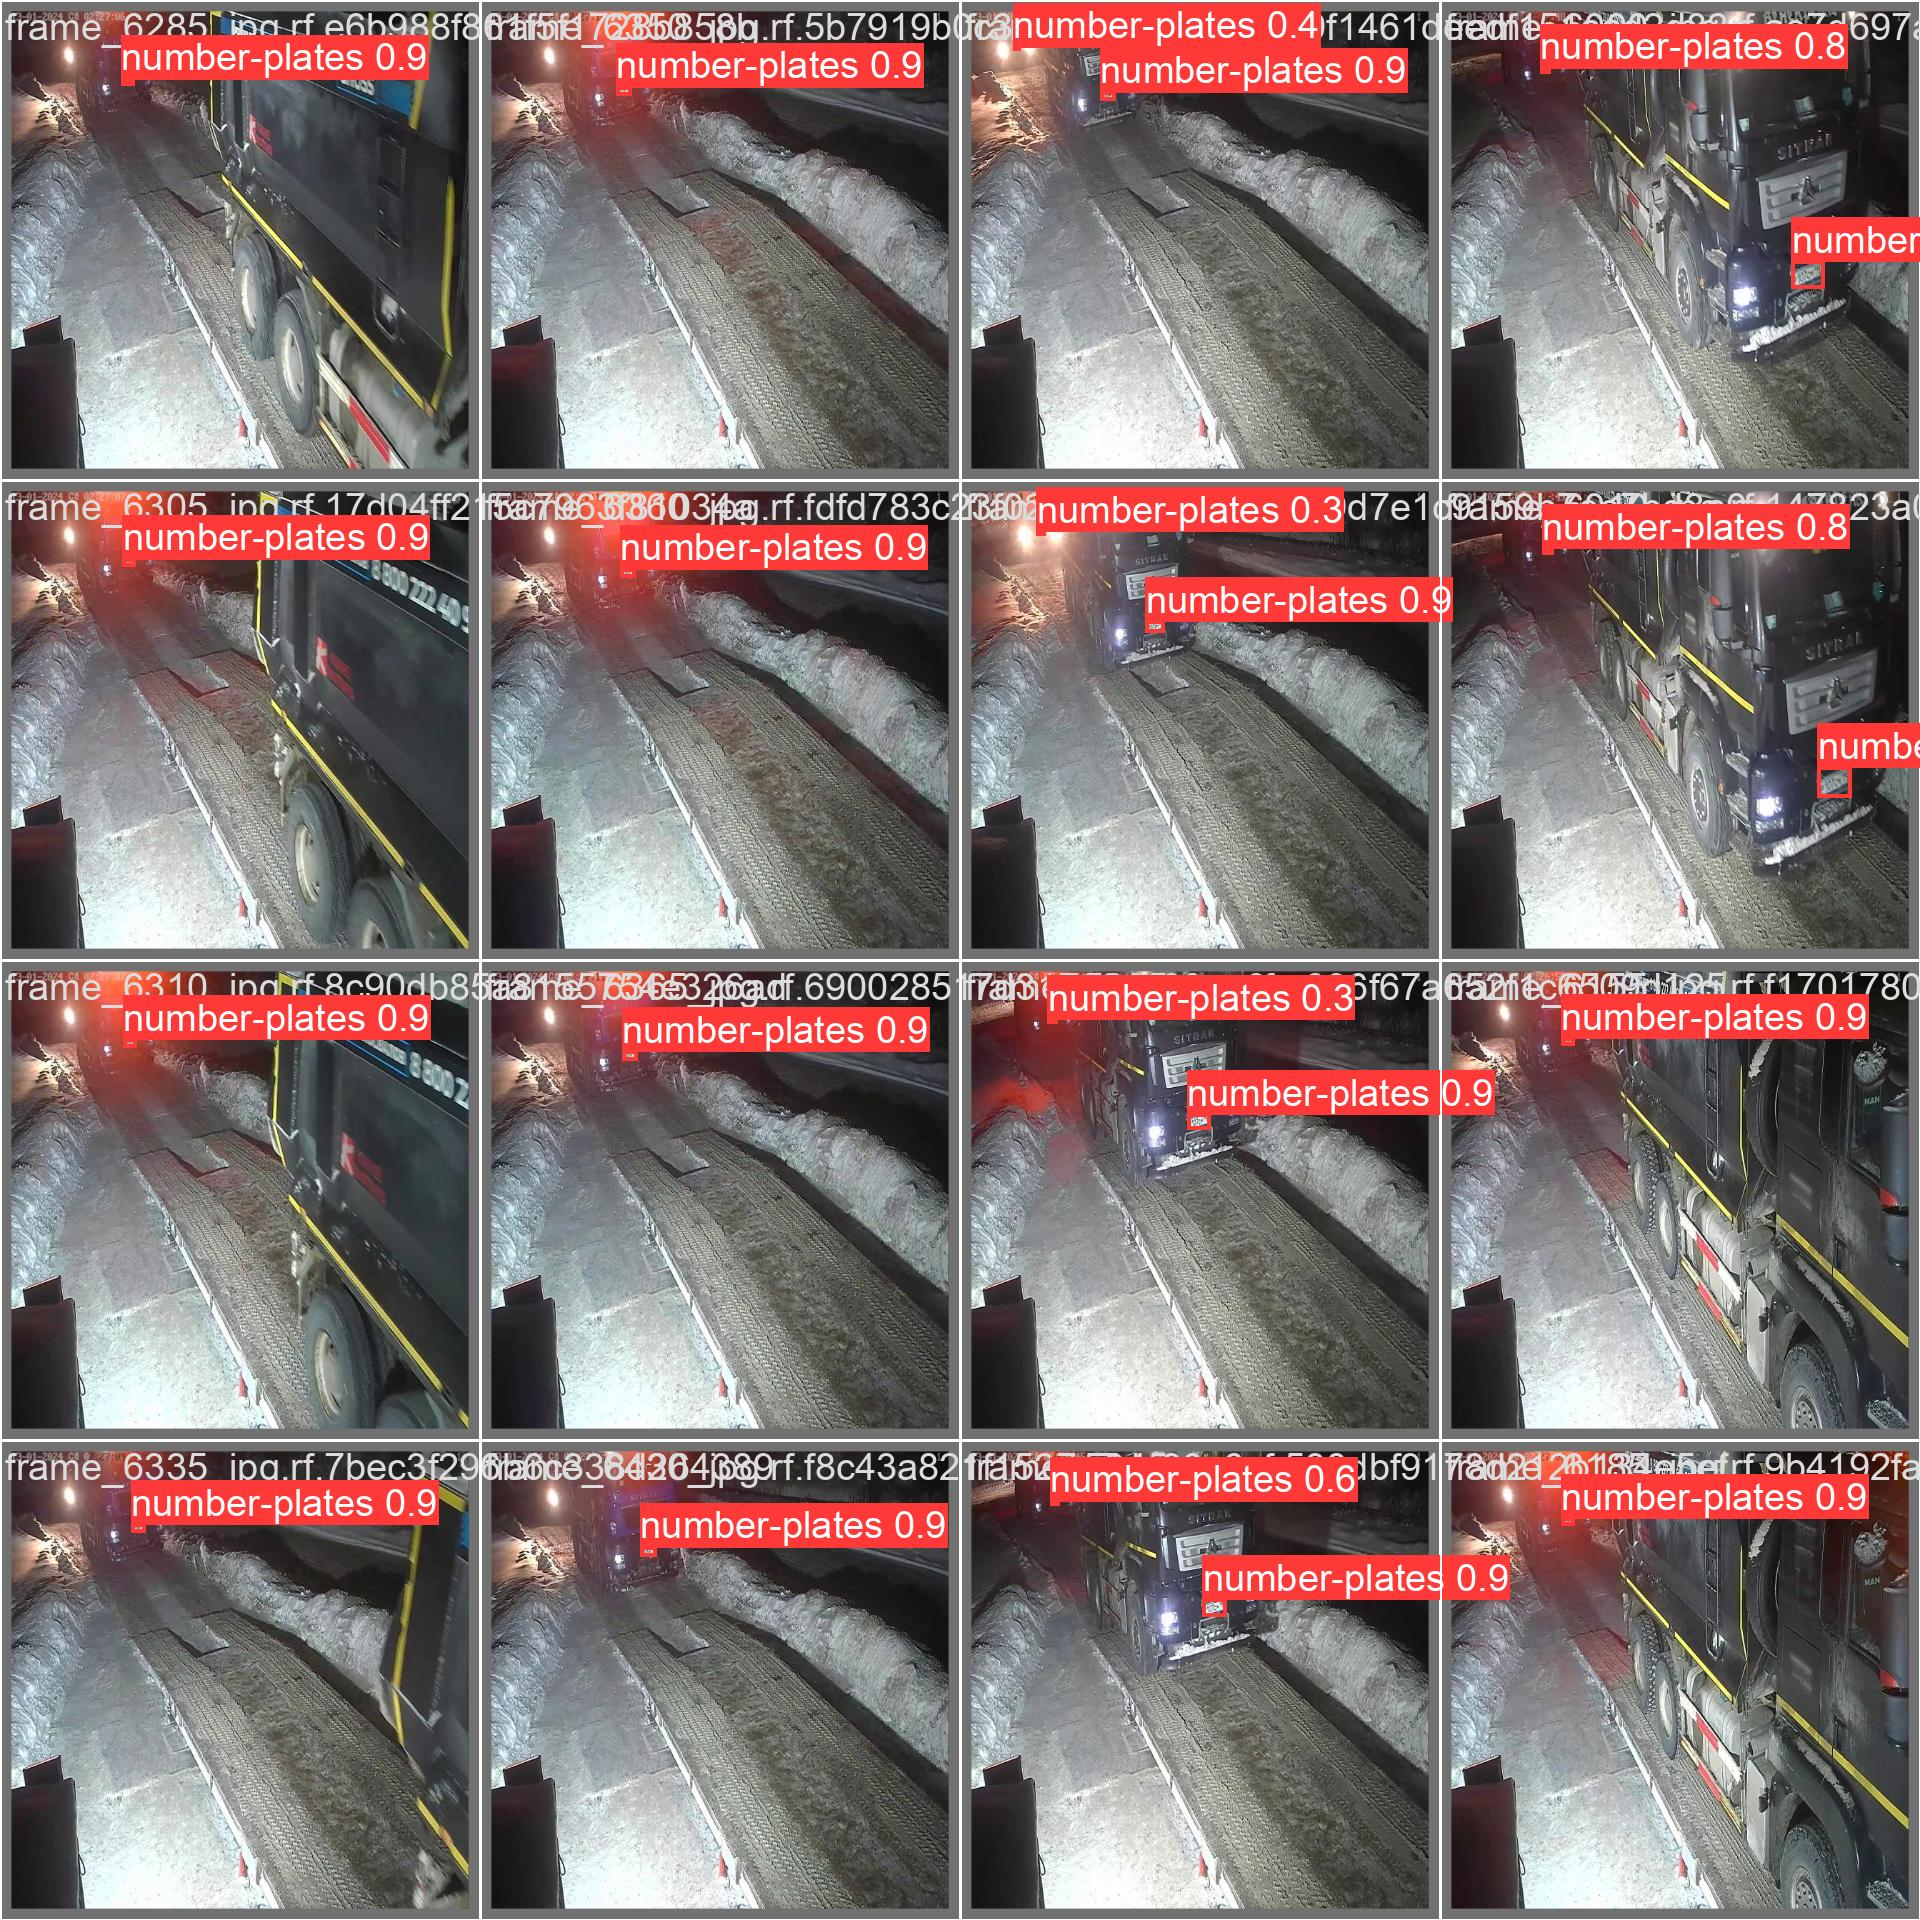

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [12]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/datasets/license-plate-recognition-2/valid/labels.cache... 434 images, 1 backgrounds, 0 corrupt: 100% 434/434 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 28/28 [00:07<00:00,  3.91it/s]
                   all        434        461      0.966       0.98      0.992       0.87
Speed: 1.1ms preprocess, 5.0ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [13]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/217 /content/datasets/license-plate-recognition-2/test/images/frame_1035_jpg.rf.e6cfd66ab36f56abefa13266669ad598.jpg: 640x640 1 number-plates, 11.0ms
image 2/217 /content/datasets/license-plate-recognition-2/test/images/frame_11180_jpg.rf.63fedfe245205d64c61b3907f61bc0d1.jpg: 640x640 1 number-plates, 7.4ms
image 3/217 /content/datasets/license-plate-recognition-2/test/images/frame_11265_jpg.rf.9b12a4c5d120a937d61e9d4552c8c445.jpg: 640x640 1 number-plates, 7.3ms
image 4/217 /content/datasets/license-plate-recognition-2/test/images/frame_11300_jpg.rf.3925de0fd0ae909755aee90bbfc99cca.jpg: 640x640 1 number-plates, 7.3ms
image 5/217 /content/datasets/license-plate-recognition-2/test/images/frame_11310_jpg.rf.1149882521af96091bc40ff75b442acc.jpg: 640x640 1 number-plates, 7.3ms
image 6/217 /content/datasets/lic

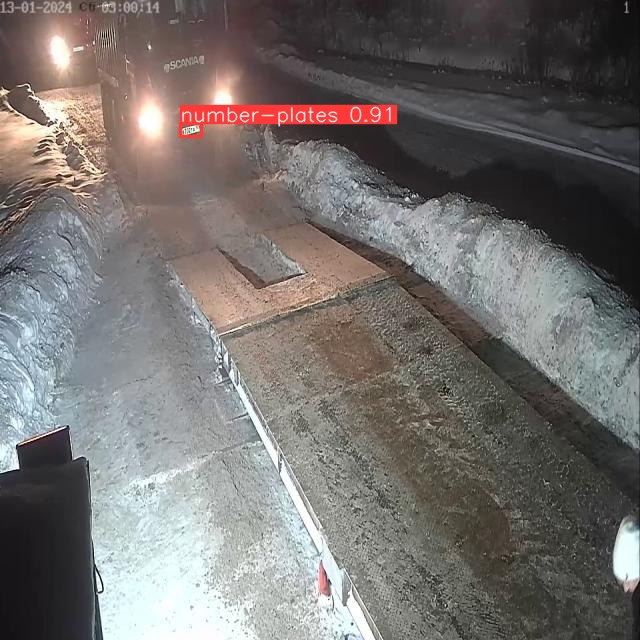

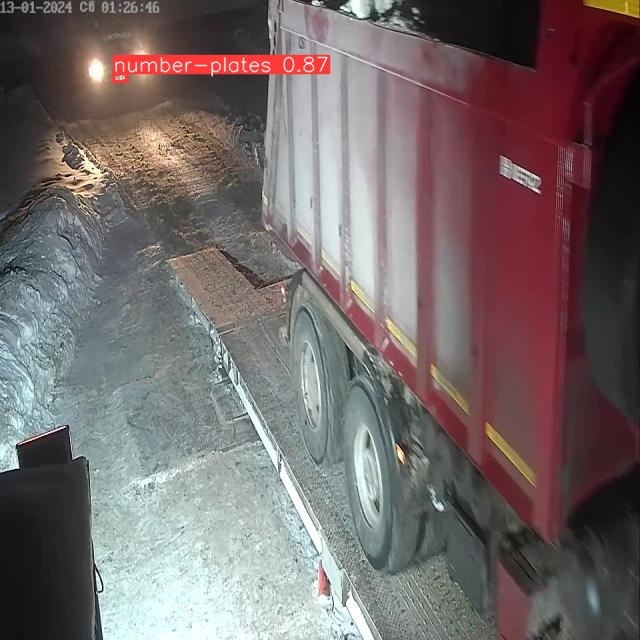

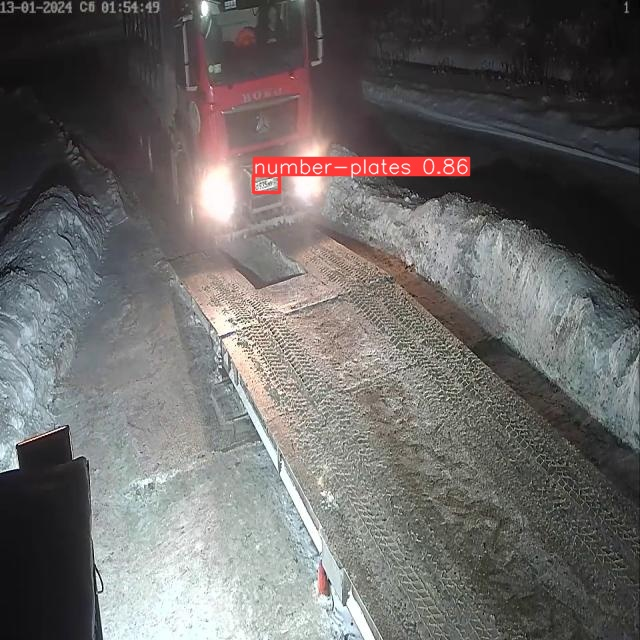

In [14]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")